In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [182]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()

In [183]:
data=pd.read_csv('train_final.csv')
data.head()

,Unnamed: 0,id,activity_new,channel_sales,date_activ,date_end,date_modif_prod,date_renewal,has_gas,origin_up,...,nb_prod_act,net_margin,num_years_antig,pow_max,churn,agg_margin,agg_cons,price_p1_var,price_p2_var,price_p1_fix
0,0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,2012-11-07,2016-11-06,2012-11-07,2015-11-09,f,ldkssxwpmemidmecebumciepifcamkci,...,0.000000,12.010084,1.098612,5.192957,0,-41.76,54.248738,0.103449,0.092115,58.956502
1,1,24011ae4ebbe3035111d65fa7c15bc57,Unknown,foosdfpfkusacimwkcsosbicdxkicaua,2013-06-15,2016-06-15,2013-06-15,2015-06-23,t,lxidpiddsbxsbosboudacockeimpuepw,...,0.693147,8.789303,1.098612,3.776157,1,25.44,0.000000,0.122856,0.102137,40.640023
2,2,d29c2c54acc38ff3c0614d0a653813dd,Unknown,Unknown,2009-08-21,2016-08-30,2009-08-21,2015-08-31,f,kamkkxfxxuwbdslkwifmmcsiusiuosws,...,0.000000,2.663242,1.791759,2.624669,0,16.38,13.257205,0.149934,0.000000,44.315416
3,3,764c75f661154dac3a6c254cd082ea7d,Unknown,foosdfpfkusacimwkcsosbicdxkicaua,2010-04-16,2016-04-16,2010-04-16,2015-04-17,f,kamkkxfxxuwbdslkwifmmcsiusiuosws,...,0.000000,1.875777,1.791759,2.628718,0,28.60,6.479224,0.170512,0.088421,44.385450
4,4,bba03439a292a1e166f80264c16191cb,Unknown,lmkebamcaaclubfxadlmueccxoimlema,2010-03-30,2016-03-30,2010-03-30,2015-03-31,f,kamkkxfxxuwbdslkwifmmcsiusiuosws,...,0.000000,2.941843,1.791759,2.580217,0,30.22,9.252130,0.151210,0.000000,44.400265


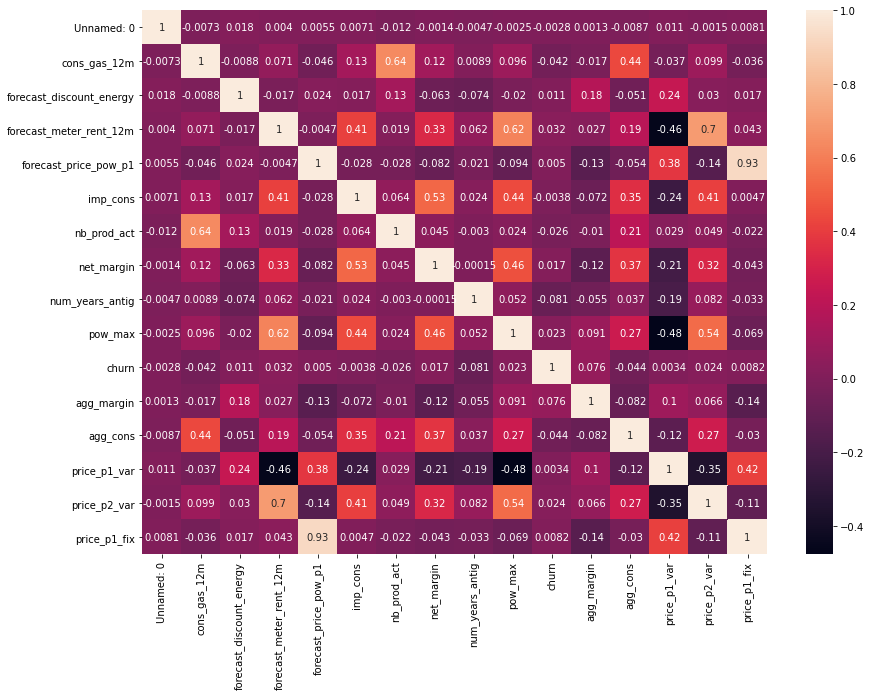

In [184]:
sns.heatmap(data.corr(),annot=True)

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16092 entries, 0 to 16091
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                16092 non-null  int64  
 1   id                        16092 non-null  object 
 2   activity_new              16092 non-null  object 
 3   channel_sales             16092 non-null  object 
 4   date_activ                16092 non-null  object 
 5   date_end                  16092 non-null  object 
 6   date_modif_prod           16092 non-null  object 
 7   date_renewal              16092 non-null  object 
 8   has_gas                   16092 non-null  object 
 9   origin_up                 16092 non-null  object 
 10  cons_gas_12m              16092 non-null  float64
 11  forecast_discount_energy  16092 non-null  float64
 12  forecast_meter_rent_12m   16092 non-null  float64
 13  forecast_price_pow_p1     16092 non-null  float64
 14  imp_co

In [186]:
target=data['churn']
ids=data[['id']]
data=data.drop(['id','Unnamed: 0'],axis=1)
data.head()

,activity_new,channel_sales,date_activ,date_end,date_modif_prod,date_renewal,has_gas,origin_up,cons_gas_12m,forecast_discount_energy,...,nb_prod_act,net_margin,num_years_antig,pow_max,churn,agg_margin,agg_cons,price_p1_var,price_p2_var,price_p1_fix
0,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,2012-11-07,2016-11-06,2012-11-07,2015-11-09,f,ldkssxwpmemidmecebumciepifcamkci,0.000000,0.0,...,0.000000,12.010084,1.098612,5.192957,0,-41.76,54.248738,0.103449,0.092115,58.956502
1,Unknown,foosdfpfkusacimwkcsosbicdxkicaua,2013-06-15,2016-06-15,2013-06-15,2015-06-23,t,lxidpiddsbxsbosboudacockeimpuepw,38.017075,0.0,...,0.693147,8.789303,1.098612,3.776157,1,25.44,0.000000,0.122856,0.102137,40.640023
2,Unknown,Unknown,2009-08-21,2016-08-30,2009-08-21,2015-08-31,f,kamkkxfxxuwbdslkwifmmcsiusiuosws,0.000000,0.0,...,0.000000,2.663242,1.791759,2.624669,0,16.38,13.257205,0.149934,0.000000,44.315416
3,Unknown,foosdfpfkusacimwkcsosbicdxkicaua,2010-04-16,2016-04-16,2010-04-16,2015-04-17,f,kamkkxfxxuwbdslkwifmmcsiusiuosws,0.000000,0.0,...,0.000000,1.875777,1.791759,2.628718,0,28.60,6.479224,0.170512,0.088421,44.385450
4,Unknown,lmkebamcaaclubfxadlmueccxoimlema,2010-03-30,2016-03-30,2010-03-30,2015-03-31,f,kamkkxfxxuwbdslkwifmmcsiusiuosws,0.000000,0.0,...,0.000000,2.941843,1.791759,2.580217,0,30.22,9.252130,0.151210,0.000000,44.400265


In [187]:
#Statistical tests on the data

In [188]:
num=data.select_dtypes(include=np.number)
num.shape

(16092, 15)

In [189]:
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

In [190]:
stats.chi2_contingency(pd.crosstab(data['channel_sales'],data['churn']))

(126.66650349808289,
 3.121968454361136e-24,
 7,
 array([[3.79838230e+03, 4.17617698e+02],
        [3.60377827e+00, 3.96221725e-01],
        [8.70312453e+02, 9.56875466e+01],
        [1.80188914e+00, 1.98110863e-01],
        [6.64446619e+03, 7.30533806e+02],
        [1.86765809e+03, 2.05341909e+02],
        [1.08113348e+01, 1.18866518e+00],
        [1.30096396e+03, 1.43036043e+02]]))

In [191]:
stats.chi2.isf(0.05,7)

14.067140449340167

In [192]:
stats.chi2_contingency(pd.crosstab(data['origin_up'],data['churn']))


(171.11365303977647,
 4.221626394134051e-35,
 5,
 array([[7.83821775e+01, 8.61782252e+00],
        [9.00944569e-01, 9.90554313e-02],
        [4.06956662e+03, 4.47433383e+02],
        [3.30015996e+03, 3.62840045e+02],
        [7.04718842e+03, 7.74811583e+02],
        [1.80188914e+00, 1.98110863e-01]]))

In [193]:
stats.chi2.isf(0.05,5)

11.070497693516355

In [194]:
pd.crosstab(data['has_gas'],data['churn'])

churn,0,1
has_gas,,
f,11768,1360
t,2730,234


In [195]:
proportions_ztest([1360,234],[1360+11768,2730+234])

(4.057204319803417, 4.9663631969112975e-05)

In [196]:
insig,sig=[],[]
for i in num:
    n0=data[data['churn']==0][i]
    n1=data[data['churn']==1][i]
    print('\n\n',i)
    k=stats.ttest_ind(n0,n1)
    print(k)
    if k[1]<0.05:
        print(i,end=' ')
        print('is  a significant feature')
        sig.append(i)
    else:
        print(i,end=' ')
        print('is not a significant feature')
        insig.append(i)



 cons_gas_12m
Ttest_indResult(statistic=5.349637700164086, pvalue=8.933608862715879e-08)
cons_gas_12m is  a significant feature


 forecast_discount_energy
Ttest_indResult(statistic=-1.3896051366980993, pvalue=0.16466804215940373)
forecast_discount_energy is not a significant feature


 forecast_meter_rent_12m
Ttest_indResult(statistic=-4.053430797011547, pvalue=5.070928443992088e-05)
forecast_meter_rent_12m is  a significant feature


 forecast_price_pow_p1
Ttest_indResult(statistic=-0.6313784400802471, pvalue=0.5278020787370252)
forecast_price_pow_p1 is not a significant feature


 imp_cons
Ttest_indResult(statistic=0.4849256485638587, pvalue=0.6277356894382188)
imp_cons is not a significant feature


 nb_prod_act
Ttest_indResult(statistic=3.323036054865293, pvalue=0.0008924201734841871)
nb_prod_act is  a significant feature


 net_margin
Ttest_indResult(statistic=-2.141336457410192, pvalue=0.03226189094635491)
net_margin is  a significant feature


 num_years_antig
Ttest_indResult

In [197]:
print('significant features in total\n', sig )
print('\n\ninsignificant features in total\n', insig )

significant features in total
 ['cons_gas_12m', 'forecast_meter_rent_12m', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max', 'churn', 'agg_margin', 'agg_cons', 'price_p2_var']


insignificant features in total
 ['forecast_discount_energy', 'forecast_price_pow_p1', 'imp_cons', 'price_p1_var', 'price_p1_fix']


In [198]:
data[['date_activ','date_end','date_modif_prod','date_renewal']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16092 entries, 0 to 16091
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date_activ       16092 non-null  object
 1   date_end         16092 non-null  object
 2   date_modif_prod  16092 non-null  object
 3   date_renewal     16092 non-null  object
dtypes: object(4)
memory usage: 503.0+ KB


In [199]:
data[['date_activ','date_end','date_modif_prod','date_renewal']].head()

,date_activ,date_end,date_modif_prod,date_renewal
0,2012-11-07,2016-11-06,2012-11-07,2015-11-09
1,2013-06-15,2016-06-15,2013-06-15,2015-06-23
2,2009-08-21,2016-08-30,2009-08-21,2015-08-31
3,2010-04-16,2016-04-16,2010-04-16,2015-04-17
4,2010-03-30,2016-03-30,2010-03-30,2015-03-31


In [200]:
data[['date_activ','date_end','date_modif_prod','date_renewal']].shape

(16092, 4)

In [201]:
data['date_activ']=pd.to_datetime(data[ 'date_activ'])
data['date_end']=pd.to_datetime(data[ 'date_end'])
data['date_modif_prod']=pd.to_datetime(data[ 'date_modif_prod'])
data['date_renewal']=pd.to_datetime(data[ 'date_renewal'])

In [202]:
# tenure = date end -date active

In [203]:
tenure=((data['date_end']-data['date_activ'])/np.timedelta64(1, "M")).astype('int')
tenure.head()

0    47
1    36
2    84
3    72
4    72
dtype: int32

In [204]:
modif=(data['date_modif_prod']-data['date_activ'])/np.timedelta64(1,'M')# months from active modified
renewal=(data['date_renewal']-data['date_activ'])/np.timedelta64(1,'M')# months from active renewed

In [205]:
data['renewal']=renewal
data['modif']=modif
data['tenure']=tenure
data=data.drop(['date_activ','date_end','date_modif_prod','date_renewal'],axis=1)

In [206]:
data[['renewal','modif','tenure']].skew()

renewal    1.242092
modif      1.033414
tenure     1.267130
dtype: float64

In [207]:
np.cbrt(data[['renewal','modif','tenure']]).skew()

renewal    0.294775
modif      0.176133
tenure     0.477978
dtype: float64

In [208]:
data[['renewal','modif','tenure']]=np.cbrt(data[['renewal','modif','tenure']])

In [209]:
data.head()

,activity_new,channel_sales,has_gas,origin_up,cons_gas_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_pow_p1,imp_cons,nb_prod_act,...,pow_max,churn,agg_margin,agg_cons,price_p1_var,price_p2_var,price_p1_fix,renewal,modif,tenure
0,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,f,ldkssxwpmemidmecebumciepifcamkci,0.000000,0.0,7.109107,58.995952,9.404585,0.000000,...,5.192957,0,-41.76,54.248738,0.103449,0.092115,58.956502,3.303205,0.0,3.608826
1,Unknown,foosdfpfkusacimwkcsosbicdxkicaua,t,lxidpiddsbxsbosboudacockeimpuepw,38.017075,0.0,1.211918,40.606701,0.000000,0.693147,...,3.776157,1,25.44,0.000000,0.122856,0.102137,40.640023,2.894357,0.0,3.301927
2,Unknown,Unknown,f,kamkkxfxxuwbdslkwifmmcsiusiuosws,0.000000,0.0,2.533937,44.311378,0.000000,0.000000,...,2.624669,0,16.38,13.257205,0.149934,0.000000,44.315416,4.166199,0.0,4.379519
3,Unknown,foosdfpfkusacimwkcsosbicdxkicaua,f,kamkkxfxxuwbdslkwifmmcsiusiuosws,0.000000,0.0,3.383076,44.311378,0.000000,0.000000,...,2.628718,0,28.60,6.479224,0.170512,0.088421,44.385450,3.915430,0.0,4.160168
4,Unknown,lmkebamcaaclubfxadlmueccxoimlema,f,kamkkxfxxuwbdslkwifmmcsiusiuosws,0.000000,0.0,2.706705,44.311378,0.000000,0.000000,...,2.580217,0,30.22,9.252130,0.151210,0.000000,44.400265,3.915430,0.0,4.160168


In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16092 entries, 0 to 16091
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   activity_new              16092 non-null  object 
 1   channel_sales             16092 non-null  object 
 2   has_gas                   16092 non-null  object 
 3   origin_up                 16092 non-null  object 
 4   cons_gas_12m              16092 non-null  float64
 5   forecast_discount_energy  16092 non-null  float64
 6   forecast_meter_rent_12m   16092 non-null  float64
 7   forecast_price_pow_p1     16092 non-null  float64
 8   imp_cons                  16092 non-null  float64
 9   nb_prod_act               16092 non-null  float64
 10  net_margin                16092 non-null  float64
 11  num_years_antig           16092 non-null  float64
 12  pow_max                   16092 non-null  float64
 13  churn                     16092 non-null  int64  
 14  agg_ma

In [302]:
num=data.select_dtypes(include=np.number)
num.shape

(16092, 18)

In [303]:
num.columns

Index(['cons_gas_12m', 'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_pow_p1', 'imp_cons', 'nb_prod_act', 'net_margin',
       'num_years_antig', 'pow_max', 'churn', 'agg_margin', 'agg_cons',
       'price_p1_var', 'price_p2_var', 'price_p1_fix', 'renewal', 'modif',
       'tenure'],
      dtype='object')

In [304]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
from sklearn import metrics
from mlxtend.feature_selection import SequentialFeatureSelector

In [305]:
cat=data.select_dtypes(include='object')
num=num.drop('churn',axis=1)
#dropping the activity new column  for having too many uniques

In [306]:
cat_dum=pd.get_dummies(cat.drop('activity_new',axis=1),drop_first=True).reset_index(drop=True)
cat_dum.shape,num.shape

((16092, 13), (16092, 17))

In [307]:
num_sc=pd.DataFrame(sc.fit_transform(num),columns=num.columns).reset_index(drop=True)
X=pd.concat([cat_dum,num_sc],axis=1)
Xc=sm.add_constant(X)
y=target

In [308]:
Xc.shape,cat_dum.shape,num_sc.shape,y.shape

((16092, 31), (16092, 13), (16092, 17), (16092,))

In [309]:
y.shape,

((16092,),)

In [310]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [311]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(X, y, test_size=0.2, random_state=42)

In [312]:
logr=LogisticRegression(solver='saga',max_iter=10000)
logr.fit(X_train0,y_train0)

LogisticRegression(max_iter=10000, solver='saga')

In [313]:
y_pred_test=logr.predict(X_test0)
print(metrics.classification_report(y_test0,y_pred_test))
print('ROC SCORE:',metrics.roc_auc_score(y_test0,logr.predict_proba(X_test0)[:,1]))
print('F1 :', metrics.f1_score(y_test0,y_pred_test))
metrics.confusion_matrix(y_test0,y_pred_test)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2897
           1       0.29      0.01      0.01       322

    accuracy                           0.90      3219
   macro avg       0.59      0.50      0.48      3219
weighted avg       0.84      0.90      0.85      3219

ROC SCORE: 0.6368228430781898
F1 : 0.0121580547112462


array([[2892,    5],
       [ 320,    2]], dtype=int64)

In [293]:
asfsdf

NameError: name 'asfsdf' is not defined

In [132]:
#best set of features 
logr=LogisticRegression(penalty='l2',max_iter=10000,solver='saga')
sfs=SequentialFeatureSelector(estimator=logr,k_features='best',forward=True,n_jobs=-1,cv=3,verbose=3)
sfs.fit(X_train0,y_train0)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    7.4s finished

[2021-07-19 01:53:22] Features: 1/34 -- score: 0.9011885341412258[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  33 | elapsed:    0.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.8s finished

[2021-07-19 01:53:23] Features: 2/34 -- score: 0.9011885341412258[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    6.7s finished

[2021-07-19 01:53:29] Features: 3/34 -- score: 0.9011885341412258[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    9.2s finished

[2021-07

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.1min finished

[2021-07-19 02:16:06] Features: 34/34 -- score: 0.9007224423211372

SequentialFeatureSelector(cv=3,
                          estimator=LogisticRegression(max_iter=10000,
                                                       solver='saga'),
                          k_features='best', n_jobs=-1, verbose=3)

In [133]:
sfs.k_feature_names_

('channel_sales_Unknown',)

In [ ]:
from sklearn.feature_selection import RFE
rec=RFE(estimator=logr, n_features_to_select=15)
rec.fit(X,y)

In [135]:
df=pd.DataFrame(rec.ranking_,index=X.columns,columns=['ranking'])
df

,ranking
channel_sales_Unknown,1
channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,1
channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,1
channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,3
channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,1
channel_sales_lmkebamcaaclubfxadlmueccxoimlema,15
channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,1
channel_sales_usilxuppasemubllopkaafesmlibmsdf,1
has_gas_f,18
has_gas_t,14


In [43]:
#using random over sampling on data set

In [314]:
y.value_counts()/y.shape[0]*100

0    90.094457
1     9.905543
Name: churn, dtype: float64

In [315]:
X.shape

(16092, 30)

In [316]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(X, y, test_size=0.1, random_state=42)

In [317]:
from imblearn.over_sampling import RandomOverSampler
sampler=RandomOverSampler(random_state=110)
X0,y0=sampler.fit_resample(X_train0,y_train0)

In [318]:
y0.value_counts()

0    13053
1    13053
Name: churn, dtype: int64

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X0, y0, test_size=0.2, random_state=42)

In [320]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [321]:
RF=RandomForestClassifier(criterion='gini')
RF.fit(X_train,y_train)
y_pred_test=RF.predict(X_test)
print(metrics.classification_report(y_test,y_pred_test))
print('ROC SCORE:',metrics.roc_auc_score(y_test,RF.predict_proba(X_test)[:,1]))
print('F1 :', metrics.f1_score(y_test,y_pred_test))
metrics.confusion_matrix(y_test,y_pred_test)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2652
           1       0.99      1.00      0.99      2570

    accuracy                           1.00      5222
   macro avg       0.99      1.00      1.00      5222
weighted avg       1.00      1.00      1.00      5222

ROC SCORE: 0.9999567905581866
F1 : 0.9949592865451725


array([[2630,   22],
       [   4, 2566]], dtype=int64)

In [322]:
from sklearn.model_selection import RandomizedSearchCV

In [323]:
RF=RandomForestClassifier()
params={'n_estimators':[50,100,150,200],'max_depth':[4,5,6,7,8],'max_leaf_nodes':[8,12,16,20,24,28,32],
       }
RS=RandomizedSearchCV(estimator=RF,param_distributions=params,n_iter=10,cv=3,verbose=3,random_state=110,n_jobs=-1)
RS.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8],
                                        'max_leaf_nodes': [8, 12, 16, 20, 24,
                                                           28, 32],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=110, verbose=3)

In [324]:
RS.best_estimator_

RandomForestClassifier(max_depth=5, max_leaf_nodes=32, n_estimators=200)

In [325]:
RF=RandomForestClassifier(max_depth=7, max_leaf_nodes=20, n_estimators=150)
RF.fit(X_train,y_train)
y_pred_test=RF.predict(X_test)
print(metrics.classification_report(y_test,y_pred_test))
print('ROC SCORE:',metrics.roc_auc_score(y_test,RF.predict_proba(X_test)[:,1]))
print('F1 :', metrics.f1_score(y_test,y_pred_test))
metrics.confusion_matrix(y_test,y_pred_test)

              precision    recall  f1-score   support

           0       0.66      0.59      0.62      2652
           1       0.62      0.69      0.65      2570

    accuracy                           0.64      5222
   macro avg       0.64      0.64      0.64      5222
weighted avg       0.64      0.64      0.64      5222

ROC SCORE: 0.7034725278917314
F1 : 0.6514369933677229


array([[1562, 1090],
       [ 802, 1768]], dtype=int64)

In [326]:
print(metrics.classification_report(y_test0,RF.predict(X_test0)))
metrics.confusion_matrix(y_test0,RF.predict(X_test0))

              precision    recall  f1-score   support

           0       0.93      0.62      0.74      1445
           1       0.15      0.61      0.25       165

    accuracy                           0.62      1610
   macro avg       0.54      0.61      0.49      1610
weighted avg       0.85      0.62      0.69      1610



array([[890, 555],
       [ 64, 101]], dtype=int64)

In [327]:
Logr=LogisticRegression(solver='saga',max_iter=10000)
Logr.fit(X_train,y_train)
y_pred_test=Logr.predict(X_test)
print(metrics.classification_report(y_test,y_pred_test))
print('ROC SCORE:',metrics.roc_auc_score(y_test,Logr.predict_proba(X_test)[:,1]))
print('F1 :', metrics.f1_score(y_test,y_pred_test))
metrics.confusion_matrix(y_test,y_pred_test)

              precision    recall  f1-score   support

           0       0.62      0.54      0.57      2652
           1       0.58      0.65      0.61      2570

    accuracy                           0.59      5222
   macro avg       0.60      0.60      0.59      5222
weighted avg       0.60      0.59      0.59      5222

ROC SCORE: 0.633989324553527
F1 : 0.6136446552353156


array([[1422, 1230],
       [ 888, 1682]], dtype=int64)

In [328]:
from sklearn.neighbors import KNeighborsClassifier
K=KNeighborsClassifier(n_neighbors=8,n_jobs=-1)
K.fit(X_train,y_train)
y_pred_test=K.predict(X_test)
print(metrics.classification_report(y_test,y_pred_test))
#print('ROC SCORE:',metrics.roc_auc_score(y_test,Logr.predict_proba(X_test)[:,1]))
print('F1 :', metrics.f1_score(y_test,y_pred_test))
metrics.confusion_matrix(y_test,y_pred_test)

              precision    recall  f1-score   support

           0       0.91      0.69      0.79      2652
           1       0.75      0.93      0.83      2570

    accuracy                           0.81      5222
   macro avg       0.83      0.81      0.81      5222
weighted avg       0.83      0.81      0.81      5222

F1 : 0.8282898149749266


array([[1834,  818],
       [ 175, 2395]], dtype=int64)

In [329]:
print(metrics.classification_report(y_test0,K.predict(X_test0)))
metrics.confusion_matrix(y_test0,K.predict(X_test0))

              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1445
           1       0.14      0.43      0.21       165

    accuracy                           0.67      1610
   macro avg       0.53      0.56      0.50      1610
weighted avg       0.83      0.67      0.73      1610



array([[1001,  444],
       [  94,   71]], dtype=int64)

In [330]:
ADA=AdaBoostClassifier(learning_rate=.2,n_estimators=100)
ADA.fit(X_train,y_train)
y_pred_test=ADA.predict(X_test)
print(metrics.classification_report(y_test,y_pred_test))
print('ROC SCORE:',metrics.roc_auc_score(y_test,ADA.predict_proba(X_test)[:,1]))
print('F1 :', metrics.f1_score(y_test,y_pred_test))
metrics.confusion_matrix(y_test,y_pred_test)

              precision    recall  f1-score   support

           0       0.64      0.59      0.62      2652
           1       0.61      0.66      0.63      2570

    accuracy                           0.63      5222
   macro avg       0.63      0.63      0.63      5222
weighted avg       0.63      0.63      0.63      5222

ROC SCORE: 0.6805685893034257
F1 : 0.634867190422746


array([[1573, 1079],
       [ 873, 1697]], dtype=int64)

In [331]:
print(metrics.classification_report(y_test0,ADA.predict(X_test0)))
metrics.confusion_matrix(y_test0,ADA.predict(X_test0))

              precision    recall  f1-score   support

           0       0.94      0.61      0.74      1445
           1       0.16      0.63      0.25       165

    accuracy                           0.61      1610
   macro avg       0.55      0.62      0.49      1610
weighted avg       0.86      0.61      0.69      1610



array([[879, 566],
       [ 61, 104]], dtype=int64)

In [332]:
from xgboost import XGBClassifier
XGB=XGBClassifier(use_label_encoder=False)
XGB.fit(X_train,y_train)
y_pred_test=XGB.predict(X_test)
print(metrics.classification_report(y_test,y_pred_test))
print('ROC SCORE:',metrics.roc_auc_score(y_test,XGB.predict_proba(X_test)[:,1]))
print('F1 :', metrics.f1_score(y_test,y_pred_test))
metrics.confusion_matrix(y_test,y_pred_test)

[16:11:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      2652
           1       0.89      0.95      0.92      2570

    accuracy                           0.92      5222
   macro avg       0.92      0.92      0.92      5222
weighted avg       0.92      0.92      0.92      5222

ROC SCORE: 0.9766195104201513
F1 : 0.9179160419790106


array([[2335,  317],
       [ 121, 2449]], dtype=int64)

In [68]:
XGB=XGBClassifier(use_label_encoder=False)

params={'n_estimators':[50,100,150,200],'max_depth':[4,5,6,7,8],'min_child_weight ':[0,.5,1],
       'learning_rate':[0.01,0.1,0.25,0.5,1],'gamma':[.5,1,2,5]}
RS=RandomizedSearchCV(estimator=XGB,param_distributions=params,n_iter=10,cv=5,verbose=3,random_state=110,n_jobs=-1)
RS.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[13:49:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_child_weight  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:49:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [69]:
RS.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=1, min_child_weight =0.5, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [333]:
XGB=XGBClassifier(use_label_encoder=False,max_depth=7,learning_rate=.1,gamma=5,min_child_weight=1)
XGB.fit(X_train,y_train)
y_pred_test=XGB.predict(X_test)
print(metrics.classification_report(y_test,y_pred_test))
print('ROC SCORE:',metrics.roc_auc_score(y_test,XGB.predict_proba(X_test)[:,1]))
print('F1 :', metrics.f1_score(y_test,y_pred_test))
metrics.confusion_matrix(y_test,y_pred_test)

[16:11:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      2652
           1       0.83      0.88      0.86      2570

    accuracy                           0.86      5222
   macro avg       0.86      0.86      0.86      5222
weighted avg       0.86      0.86      0.85      5222

ROC SCORE: 0.935325662740403
F1 : 0.8568186116890486


array([[2200,  452],
       [ 305, 2265]], dtype=int64)

In [334]:
print(metrics.classification_report(y_test0,XGB.predict(X_test0)))
metrics.confusion_matrix(y_test0,XGB.predict(X_test0))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1445
           1       0.25      0.42      0.31       165

    accuracy                           0.81      1610
   macro avg       0.59      0.64      0.60      1610
weighted avg       0.86      0.81      0.83      1610



array([[1231,  214],
       [  95,   70]], dtype=int64)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

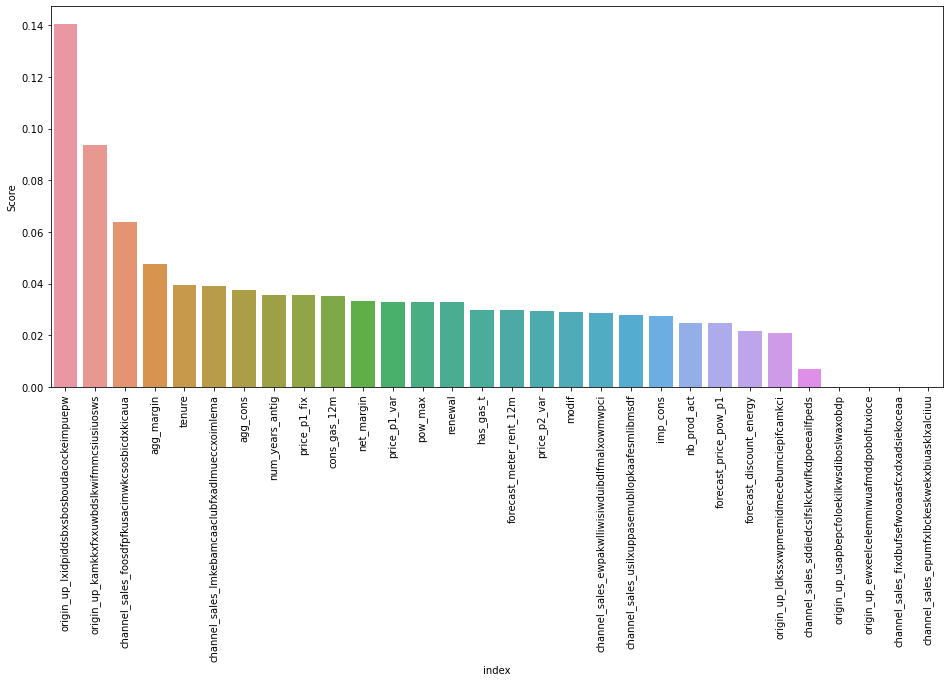

In [335]:
df=pd.DataFrame(XGB.feature_importances_,index=X_train0.columns,columns=['Score']).reset_index()
df=df.sort_values(by='Score',ascending=False)

plt.rcParams['figure.figsize']=[16,7]
sns.barplot(df['index'],df['Score'])
plt.xticks(rotation='vertical')

In [336]:
from sklearn.model_selection import cross_val_predict,cross_val_score

In [337]:
def crossvalidate(model):
    CV=cross_val_score(estimator=model, X=X_train,y=y_train,cv=3)
    print('Scores:', CV)
    print('Mean Score:',CV.mean())

In [338]:
print('KNeighborsClassifier')
crossvalidate(KNeighborsClassifier())

print('\n\nXGBClassifier')
crossvalidate(XGBClassifier(use_label_encoder=False))

print('\n\nLogisticRegression')
crossvalidate(LogisticRegression(solver='saga',max_iter=10000))

print('\n\nAdaBoostClassifier')
crossvalidate(AdaBoostClassifier())


KNeighborsClassifier
Scores: [0.80767021 0.80304554 0.79485706]
Mean Score: 0.8018576033036581


XGBClassifier
[16:12:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if

In [339]:
def ROC(model):
    proba=model.predict_proba(X_test)[:,1]
    fpr,tpr,th=metrics.roc_curve(y_test,proba)
    plt.plot(fpr,tpr,marker=',',label=[model,metrics.roc_auc_score(y_test,proba)])
    plt.plot([0,1],[0,1],linestyle='--',color='red')
    plt.legend()

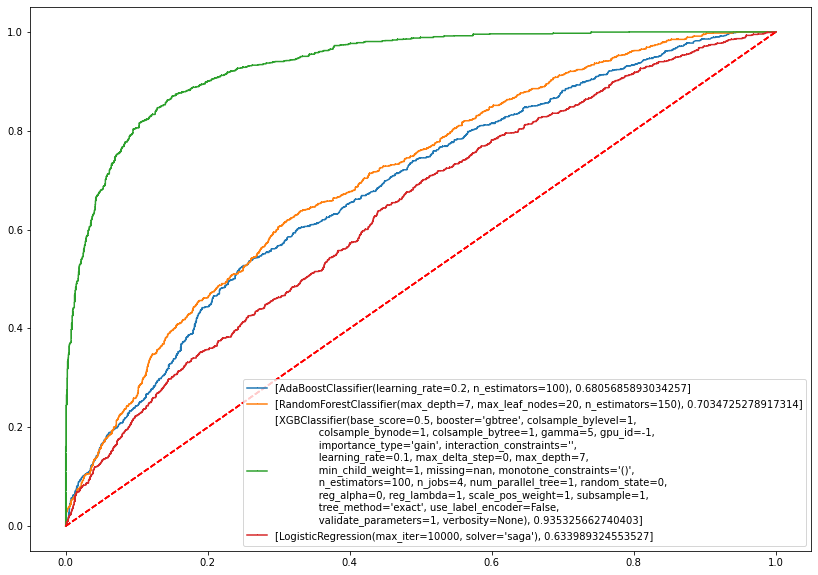

In [340]:
plt.rcParams['figure.figsize']=[14,10]
ROC(ADA)
ROC(RF)
ROC(XGB)
ROC(Logr)

In [341]:
X.columns

Index(['channel_sales_epumfxlbckeskwekxbiuasklxalciiuu',
       'channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci',
       'channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa',
       'channel_sales_foosdfpfkusacimwkcsosbicdxkicaua',
       'channel_sales_lmkebamcaaclubfxadlmueccxoimlema',
       'channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds',
       'channel_sales_usilxuppasemubllopkaafesmlibmsdf', 'has_gas_t',
       'origin_up_ewxeelcelemmiwuafmddpobolfuxioce',
       'origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'origin_up_ldkssxwpmemidmecebumciepifcamkci',
       'origin_up_lxidpiddsbxsbosboudacockeimpuepw',
       'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'cons_gas_12m',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_pow_p1', 'imp_cons', 'nb_prod_act', 'net_margin',
       'num_years_antig', 'pow_max', 'agg_margin', 'agg_cons', 'price_p1_var',
       'price_p2_var', 'price_p1_fix', 'renewal', 'modif', 'tenure'],
      dtype='object')

In [392]:
cat=data.select_dtypes(include='object')
cat.head()

,activity_new,channel_sales,has_gas,origin_up
0,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,f,ldkssxwpmemidmecebumciepifcamkci
1,Unknown,foosdfpfkusacimwkcsosbicdxkicaua,t,lxidpiddsbxsbosboudacockeimpuepw
2,Unknown,Unknown,f,kamkkxfxxuwbdslkwifmmcsiusiuosws
3,Unknown,foosdfpfkusacimwkcsosbicdxkicaua,f,kamkkxfxxuwbdslkwifmmcsiusiuosws
4,Unknown,lmkebamcaaclubfxadlmueccxoimlema,f,kamkkxfxxuwbdslkwifmmcsiusiuosws


In [391]:
c.shape

(16092, 432)

In [394]:
c=pd.get_dummies(cat[['has_gas','origin_up','channel_sales']],drop_first=True)
new=pd.concat([c,num_sc,target],axis=1)
c.shape,new.shape

((16092, 13), (16092, 31))

In [491]:
cus=new[new['churn']==0].drop('churn',axis=1).copy(deep=True)

In [492]:
from sklearn.cluster import KMeans

In [478]:
#concidering all the customer who has not churned

In [479]:
y.value_counts()

0    14498
1     1594
Name: churn, dtype: int64

In [480]:
cus.shape

(14498, 30)

In [481]:
e=[]
for i in range(2,15):
    KM=KMeans(n_clusters=i)
    KM.fit(cus)
    e.append(KM.inertia_)

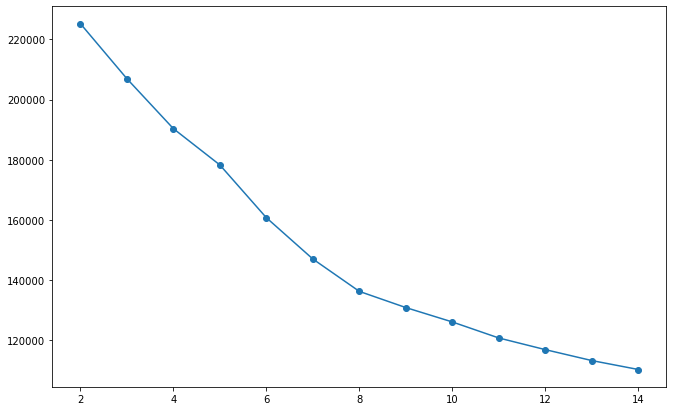

In [482]:
plt.rcParams['figure.figsize']=[11,7]
plt.plot(np.arange(2,15),e,marker='o')

In [483]:
KM=KMeans(n_clusters=2)
KM.fit(cus)

KMeans(n_clusters=2)

In [484]:
lbl=pd.DataFrame(KM.labels_,columns=['labels'])
lbl.value_counts()/lbl.shape[0]

labels
1         0.583943
0         0.416057
dtype: float64

In [499]:
cus=new[new['churn']==0].drop('churn',axis=1).copy(deep=True)
cus['labels']=KM.labels_

In [500]:
n1=cus['price_p1_fix']
n2=cus['price_p1_var']
n3=cus['price_p2_var']
for i in range(cus.shape[0]):
    if cus['labels'].iloc[i]==1:
        n1=n1*.8
        n2=n2*.8
        n3=n3*.8
cus['price_p1_fix']=n1
cus['price_p1_var']=n2
cus['price_p2_var']=n3

In [468]:
num_sc.head()

,cons_gas_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_pow_p1,imp_cons,nb_prod_act,net_margin,num_years_antig,pow_max,agg_margin,agg_cons,price_p1_var,price_p2_var,price_p1_fix,renewal,modif,tenure
0,-0.365024,-0.191207,2.254024,2.976542,1.689951,-0.481342,2.951821,-1.505559,4.452821,-2.627054,1.083137,-1.545772,0.756978,2.914238,-0.906780,-0.958099,-0.985806
1,1.637571,-0.191207,-1.448720,-0.564868,-0.992962,1.336979,1.564805,-1.505559,1.791548,0.143285,-1.154502,-0.747032,0.957992,-0.501244,-1.787778,-0.958099,-1.753514
2,-0.365024,-0.191207,-0.618647,0.148580,-0.992962,-0.481342,-1.073358,0.727290,-0.371374,-0.230216,-0.607672,0.367442,-1.090551,0.184109,0.952827,-0.958099,0.942084
3,-0.365024,-0.191207,-0.085487,0.148580,-0.992962,-0.481342,-1.412477,0.727290,-0.363767,0.273557,-0.887248,1.214365,0.682894,0.197168,0.412462,-0.958099,0.393376
4,-0.365024,-0.191207,-0.510169,0.148580,-0.992962,-0.481342,-0.953380,0.727290,-0.454871,0.340342,-0.772872,0.419963,-1.090551,0.199930,0.412462,-0.958099,0.393376


In [501]:
e=[]
for i in range(2,15):
    KM=KMeans(n_clusters=i)
    KM.fit(cus)
    e.append(KM.inertia_)

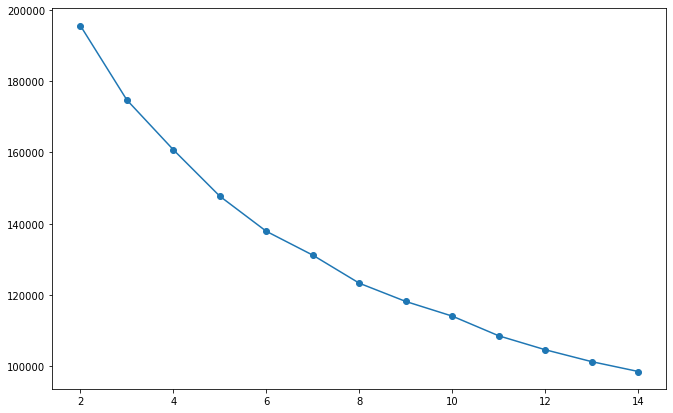

In [502]:
plt.rcParams['figure.figsize']=[11,7]
plt.plot(np.arange(2,15),e,marker='o')

In [503]:
KM=KMeans(n_clusters=2)
KM.fit(cus)

KMeans(n_clusters=2)

In [504]:
lbl=pd.DataFrame(KM.labels_,columns=['labels'])
lbl.value_counts()/lbl.shape[0]

labels
1         0.525935
0         0.474065
dtype: float64